<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

<h1 style="text-align: center; color: #173587"> <u> Legendary Pokemons </u> </h1>
<p style="text-align: center; color: #1735AA"> Finding Legendary Pokemons - 
INSAID Machine Learning- Advanced Assignment </p>

![](images/pokemon_poster.png)

## Table of Content
1. [Introduction and data description](#section1)<br>
2. [Data loading and description ](#section2)<br>
3. [EDA](#section3)<br>
4. [Data Visualization](#section4)<br>
5. [Preprocessing the data](#section5)
6. [User defined functions](#section6)
    - 6.1 [User defined function to fit and predict the model](#section601)<br>
    - 6.2 [User defined function to print the classifier score](#section602)<br>
7. [Modelling and prediction](#section7)
    - 7.1 [Gaussian Naive Bayes](#section701)<br>
    - 7.2 [KNearest Neighbour Classifier](#section702)<br>
    - 7.3 [Logistic Regression](#section703)<br>
    - 7.4 [LDA](#section704)<br>
8. [Conclusions](#section8)

<a id=section1></a>
## 1. Introduction and data description:
The requirement is to analyse pokemon data. Pokemons come in different shapes, sizes and with various capabilities. Only very few pokemons are considered legendary. Capturing a legendary pokemon is always difficult because of it's unique abilities. With the given data we need to predict if a pokemon is legendary or not.

### Data Descriptions :
is_legendary indecates if a pokemon is legendary. And we need to classify a pokemon as legendary or not:

   **name**: The English name of the Pokemon <br>
   **japanese_name**:  The Original Japanese name of the Pokemon <br>
    **pokedex_number**: The entry number of the Pokemon in the National Pokedex <br>
    **percentage_male**: The percentage of the species that are male. Blank if the Pokemon is genderless. <br>
    **type1**: 			The Primary Type of the Pokemon <br>
    **type2**: 			The Secondary Type of the Pokemon <br>
    **classification**: The Classification of the Pokemon as described by the Sun and Moon Pokedex <br>
    **height_m**: 		Height of the Pokemon in metres <br>
    **weight_kg**: 		The Weight of the Pokemon in kilograms <br>
    **capture_rate**: 	Capture Rate of the Pokemon <br>
    **base_egg_steps**: The number of steps required to hatch an egg of the Pokemon <br>
    **abilities**: 		A stringified list of abilities that the Pokemon is capable of having <br>
    **experience_growth**: 	The Experience Growth of the Pokemon <br>
    **base_happiness**: Base Happiness of the Pokemon <br>
    **against_?**: 		Eighteen features that denote the amount of damage taken against an attack of a particular type <br>
    **hp**: 			The Base HP of the Pokemon <br>
    **attack**: 		The Base Attack of the Pokemon <br>
    **defense**: 		The Base Defense of the Pokemon <br>
    **sp_attack**: 		The Base Special Attack of the Pokemon <br>
    **sp_defense**: 	The Base Special Defense of the Pokemon <br>
    **speed**: 			The Base Speed of the Pokemon <br>
    **generation**: 	The numbered generation which the Pokemon was first introduced <br>
    
 **is_legendary**: Denotes if the Pokemon is legendary.

<a id=section2></a>
## 2. Data Loading and description:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [51]:
pokedata = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/pokemon.csv',encoding='latin-1')
pokedata.head(20)

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total capture_rate         classfication  defense  experience_growth  height_m  hp               japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed   type1   type2  weight_kg  generation  is_legendary
0                         ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0               0.5            0.5           0.50           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318           45         Seed PokÃ©mon       49            1059860       0.7  45  Fushigidaneãã·ã®ãã   Bulbasaur             88.1               1         65          65     45   grass  poison        6.9           1             0
1                         ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0               0.5            0.5           0.50           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405           45         Seed PokÃ©mon       63            1059860       1.0  60   Fushigisouãã·ã®ã½ã¦     Ivysaur             88.1               2         80          80     60   grass  poison       13.0           1             0
2                         ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0               0.5            0.5           0.50           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625           45         Seed PokÃ©mon      123            1059860       2.0  80  Fushigibanaãã·ã®ãã    Venusaur             88.1               3        122         120     80   grass  poison      100.0           1             0
3                            ['Blaze', 'Solar Power']         0.50           1.0             1.0               1.0            0.5           1.00           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309           45       Lizard PokÃ©mon       43            1059860       0.6  39        Hitokageããã«ã²  Charmander             88.1               4         60          50     65    fire     NaN        8.5           1             0
4                            ['Blaze', 'Solar Power']         0.50           1.0             1.0               1.0            0.5           1.00           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405           45        Flame PokÃ©mon       58            1059860       1.1  58         Lizardoãªã¶ã¼ã  Charmeleon             88.1               5         80          65     80    fire     NaN       19.0           1             0
5                            ['Blaze', 'Solar Power']         0.25           1.0             1.0               2.0            0.5           0.50           0.5             1.0            1.0           0.25             0.0          1.0             1.0             1.0              1.0           4.0            0.5            2.0     104            5120              70      

In [52]:
pokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [53]:
pokedata.describe()

against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water      attack  base_egg_steps  base_happiness  base_total     defense  experience_growth    height_m          hp  percentage_male  pokedex_number   sp_attack  sp_defense       speed   weight_kg  generation  is_legendary
count   801.000000    801.000000      801.000000        801.000000     801.000000     801.000000    801.000000      801.000000     801.000000     801.000000      801.000000   801.000000      801.000000      801.000000       801.000000    801.000000     801.000000     801.000000  801.000000      801.000000      801.000000  801.000000  801.000000       8.010000e+02  781.000000  801.000000       703.000000      801.000000  801.000000  801.000000  801.000000  781.000000  801.000000    801.000000
mean      0.996255      1.057116        0.968789          1.073970       1.068976       1.065543      1.135456        1.192884       0.985019       1.034020        1.098002     1.208177        0.887016        0.975343         1.005306      1.250312       0.983458       1.058365   77.857678     7191.011236       65.362047  428.377029   73.008739       1.054996e+06    1.163892   68.958801        55.155761      401.000000   71.305868   70.911361   66.334582   61.378105    3.690387      0.087391
std       0.597248      0.438142        0.353058          0.654962       0.522167       0.717251      0.691853        0.604488       0.558256       0.788896        0.738818     0.735356        0.266106        0.549375         0.495183      0.697148       0.500117       0.606562   32.158820     6558.220422       19.598948  119.203577   30.769159       1.602558e+05    1.080326   26.576015        20.261623      231.373075   32.353826   27.942501   28.907662  109.354766    1.930420      0.282583
min       0.250000      0.250000        0.000000          0.000000       0.250000       0.000000      0.250000        0.250000       0.000000       0.250000        0.000000     0.250000        0.000000        0.000000         0.000000      0.250000       0.250000       0.250000    5.000000     1280.000000        0.000000  180.000000    5.000000       6.000000e+05    0.100000    1.000000         0.000000        1.000000   10.000000   20.000000    5.000000    0.100000    1.000000      0.000000
25%       0.500000      1.000000        1.000000          0.500000       1.000000       0.500000      0.500000        1.000000       1.000000       0.500000        1.000000     0.500000        1.000000        0.500000         1.000000      1.000000       0.500000       0.500000   55.000000     5120.000000       70.000000  320.000000   50.000000       1.000000e+06    0.600000   50.000000        50.000000      201.000000   45.000000   50.000000   45.000000    9.000000    2.000000      0.000000
50%       1.000000      1.000000        1.000000          1.000000       1.000000       1.000000      1.000000        1.000000       1.000000       1.000000        1.000000     1.000000        1.000000        1.000000         1.000000      1.000000       1.000000       1.000000   75.000000     5120.000000       70.000000  435.000000   70.000000       1.000000e+06    1.000000   65.000000        50.000000      401.000000   65.000000   66.000000   65.000000   27.300000    4.000000      0.000000
75%       1.000000      1.000000        1.000000          1.000000       1.000000       1.000000      2.000000        1.000000       1.000000       1.000000        1.000000     2.000000        1.000000        1.000000         1.000000      2.000000       1.000000       1.000000  100.000000     6400.000000       70.000000  505.000000   90.000000       1.059860e+06    1.500000   80.000000        50.000000      601.000000   91.000000   90.000000   85.000000   64.800000    5.000000      0.000000
max       4.000000      4.00000

**Observations**: data distribution is normal for most of the column except the weight_kg column which is right skewed.

In [54]:
pokedata.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


**Observations** : there are few columns which have missing values. both height and weight columns have 20 missing values each. percentage_male has 98 records which are empty. but according to data description, missing values in percentage_male means, these are gender neutral pokemons. type2 has 384 missing values which is nearly 48%.

In [55]:
null_data = pokedata[pokedata.isnull().any(axis=1)]
null_data[null_data['percentage_male'].isnull()].head(100)

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total              capture_rate                                      classfication  defense  experience_growth  height_m   hp                             japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed     type1     type2  weight_kg  generation  is_legendary
80        ['Magnet Pull', 'Sturdy', 'Analytic']         0.50           1.0             0.5              0.50            0.5           2.00          2.00            0.25            1.0           0.50             4.0         0.50             0.5            0.00             0.50          0.50           0.25           1.00      35            5120              70         325                       190                                    Magnet PokÃ©mon       70            1000000       0.3   25                             Coilã³ã¤ã«   Magnemite              NaN              81         95          55     45  electric     steel        6.0           1             0
81        ['Magnet Pull', 'Sturdy', 'Analytic']         0.50           1.0             0.5              0.50            0.5           2.00          2.00            0.25            1.0           0.50             4.0         0.50             0.5            0.00             0.50          0.50           0.25           1.00      60            5120              70         465                        60                                    Magnet PokÃ©mon       95            1000000       1.0   50                   Rarecoilã¬ã¢ã³ã¤ã«    Magneton              NaN              82        120          70     70  electric     steel       60.0           1             0
99        ['Soundproof', 'Static', 'Aftermath']         1.00           1.0             1.0              0.50            1.0           1.00          1.00            0.50            1.0           1.00             2.0         1.00             1.0            1.00             1.00          1.00           0.50           1.00      30            5120              70         330                       190                                      Ball PokÃ©mon       50            1000000       0.5   40                 Biriridamaããªãªãã     Voltorb              NaN             100         55          55    100  electric       NaN       10.4           1             0
100       ['Soundproof', 'Static', 'Aftermath']         1.00           1.0             1.0              0.50            1.0           1.00          1.00            0.50            1.0           1.00             2.0         1.00             1.0            1.00             1.00          1.00           0.50           1.00      50            5120              70         490                        60                                      Ball PokÃ©mon       70            1000000       1.2   60                   Marumineãã«ãã¤ã³   Electrode              NaN             101         80          80    150  electric       NaN       66.6           1             0
119  ['Illuminate', 'Natural Cure', 'Analytic']         1.00           1.0             1.0              2.00            1.0           1.00          0.50            1.00            1.0           2.00             1.0         0.50             1.0            1.00             1.00          1.00           0.50           0.50      45            5120              70         340                       225                                 Starshape PokÃ©mon       55            1250000       0.8   30                  Hitodemanããããã³      Staryu              NaN             120         70          55     85     water       NaN       34.5           1             0
120  ['Illuminate', 'Natural Cure', 

In [56]:
pokedata.type1.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [57]:
pokedata.type2.value_counts()

flying      95
poison      34
ground      34
psychic     29
fairy       29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
ghost       14
rock        14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

In [58]:
# Legendary Pokemon names :
pokedata[pokedata['is_legendary'] == 1]['name']

143      Articuno
144        Zapdos
145       Moltres
149        Mewtwo
150           Mew
242        Raikou
243         Entei
244       Suicune
248         Lugia
249         Ho-Oh
250        Celebi
376      Regirock
377        Regice
378     Registeel
379        Latias
380        Latios
381        Kyogre
382       Groudon
383      Rayquaza
384       Jirachi
385        Deoxys
479          Uxie
480       Mesprit
481         Azelf
482        Dialga
483        Palkia
484       Heatran
485     Regigigas
486      Giratina
487     Cresselia
489       Manaphy
490       Darkrai
491       Shaymin
492        Arceus
493       Victini
637      Cobalion
638     Terrakion
639      Virizion
640      Tornadus
641     Thundurus
642      Reshiram
643        Zekrom
644      Landorus
645        Kyurem
646        Keldeo
647      Meloetta
648      Genesect
715       Xerneas
716       Yveltal
717       Zygarde
718       Diancie
719         Hoopa
720     Volcanion
784     Tapu Koko
785     Tapu Lele
786     Ta

In [10]:

import pandas_profiling
pokedata.profile_report(style={'full_width':True})

<a id=section3></a>
## 3. EDA:

##### Let us observe the values of classification, abilities, generation and pokedex_number closely

In [59]:
test = pokedata[['classfication','abilities','generation','pokedex_number']]
test.to_csv('values.csv') 

##### Note: ability column is a combination of multiple abilities and is highly cordinal. Let us see how many individual abilities are there. If there are fewer no. of individual abilities we can split the abilities into one hot encoding and use it in our analysis: 

In [60]:
def strToArray(test_str):
    sub_list = ["'", "[","]"] 
    for sub in sub_list: 
        test_str = test_str.replace(sub, '')
    test_array = test_str.split(',')
    return test_array

In [61]:
abilities = pokedata['abilities'].tolist()
ability_set = set()
for ability in abilities:
    for ele in strToArray(ability):
        ability_set.add(ele)

In [62]:
print(len(ability_set))

339


**Observation** : 
1. both classification and abilities are highly cordinal. Even after splitting the abilities to individual values, it has around 339 individual ability types, which is a large no. So dropping ability and classification columns
2. japanese_name and name columns are unique and dropping them
3. Preprofiling report says pokedex_number and generation are co-related. On careful observation of pokedex_number and generation values it is found that pokedex_number is the id and should be dropped. 
4. Half of the type2 values are missing. So it is better to drop the column. 

In [63]:
dropColumns = ['pokedex_number', 'japanese_name','name','classfication', 'abilities','type2']

pokedata = pokedata.drop(dropColumns,axis=1)
pokedata.head()

against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total capture_rate  defense  experience_growth  height_m  hp  percentage_male  sp_attack  sp_defense  speed  type1  weight_kg  generation  is_legendary
0          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318           45       49            1059860       0.7  45             88.1         65          65     45  grass        6.9           1             0
1          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405           45       63            1059860       1.0  60             88.1         80          80     60  grass       13.0           1             0
2          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625           45      123            1059860       2.0  80             88.1        122         120     80  grass      100.0           1             0
3          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309           45       43            1059860       0.6  39             88.1         60          50     65   fire        8.5           1             0
4          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405           45       58            1059860       1.1  58             88.1         80          65     80   fire       19.0           1             0

 ### Handling Missing values:

#### Handling Missing percentage_male values
According to [data description](https://github.com/insaid2018/Term-4/blob/master/Projects/DataDictionary/pokemon.txt) percentage_male column is blank when the pokemon is gender neutral. There are pokemons which are completely male and the value of this column is 100. We can not fill this column with 0 because there are already some columns with 0 value which mean all the pokemons of the type are females. So introducing one more column called gender_neutral and filling it with 1 if percentage_male column is blank, otherwise it is filled with 0

In [64]:
# Creating a new column called gender_neutral to indicate that pokemon is gender neutral in case of empty values.
pokedata['gender_neutral'] = pokedata.apply(lambda x: 1 if np.isnan(x['percentage_male']) else 0, axis =1)
pokedata['percentage_male'].fillna(0, inplace=True)

In [65]:
#Check if percentage_male column still has null values:
pokedata[pokedata['percentage_male'].isnull()].head()


Empty DataFrame
Columns: [against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water, attack, base_egg_steps, base_happiness, base_total, capture_rate, defense, experience_growth, height_m, hp, percentage_male, sp_attack, sp_defense, speed, type1, weight_kg, generation, is_legendary, gender_neutral]
Index: []

#### Handling Missing height and weight of pokemon
Both height and weight of 20 pokemons is missing. let us try to fill in height and weight using KNN imputation

In [66]:
pokedata['capture_rate'].value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
235                           7
50                            7
150                           7
140                           6
100                           6
127                           5
70                            4
125                           3
65                            3
55                            3
15                            2
80                            2
130                           2
220                           2
170                           2
160                           1
35                            1
30 (Meteorite)255 (Core)      1
155     

Only one value in capture_rate has strings. Looks like this is a wrong data entry. It should be either 30 or 255. Since the description says Meteorite is 30 and core is 255, let us assume that the value is 255. There are other 255 values in the column. 

In [67]:
pokedata[pokedata['capture_rate']=='30 (Meteorite)255 (Core)']


against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total              capture_rate  defense  experience_growth  height_m  hp  percentage_male  sp_attack  sp_defense  speed type1  weight_kg  generation  is_legendary  gender_neutral
773          0.5           1.0             1.0               2.0            1.0            1.0           0.5             0.5            1.0            1.0             0.0          2.0             0.5             0.5              1.0           2.0            2.0            2.0     100            6400              70         500  30 (Meteorite)255 (Core)       60            1059860       0.3  60              0.0        100          60    120  rock       40.0           7             0               1

In [68]:
pokedata.loc[773, 'capture_rate'] = 255
pokedata['capture_rate'] =pokedata['capture_rate'].astype('int')

In [69]:
pokedata = pd.get_dummies(pokedata, columns=["type1"], drop_first=True)

In [70]:
pokedata

against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total  capture_rate  defense  experience_growth  height_m   hp  percentage_male  sp_attack  sp_defense  speed  weight_kg  generation  is_legendary  gender_neutral  type1_dark  type1_dragon  type1_electric  type1_fairy  type1_fighting  type1_fire  type1_flying  type1_ghost  type1_grass  type1_ground  type1_ice  type1_normal  type1_poison  type1_psychic  type1_rock  type1_steel  type1_water
0           1.00           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318            45       49            1059860       0.7   45             88.1         65          65     45        6.9           1             0               0           0             0               0            0               0           0             0            0            1             0          0             0             0              0           0            0            0
1           1.00           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405            45       63            1059860       1.0   60             88.1         80          80     60       13.0           1             0               0           0             0               0            0               0           0             0            0            1             0          0             0             0              0           0            0            0
2           1.00           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625            45      123            1059860       2.0   80             88.1        122         120     80      100.0           1             0               0           0             0               0            0               0           0             0            0            1             0          0             0             0              0           0            0            0
3           0.50           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309            45       43            1059860       0.6   39             88.1         60          50     65        8.5           1             0               0           0             0               0            0               0           1             0            0            0             0          0             0             0              0           0            0            0
4           0.50           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405            45       58            1059860       1.1   58             88.1         80          65     

In [71]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputer.fit(pokedata)
pokedata_fill = imputer.transform(pokedata)

In [72]:
pokedata_fill

array([[1.  , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [2.  , 0.5 , 2.  , ..., 0.  , 0.  , 0.  ],
       [2.  , 2.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.5 , 0.  , ..., 0.  , 1.  , 0.  ]])

In [73]:
pokedata_final = pd.DataFrame(pokedata_fill, columns=pokedata.columns)

In [74]:
null_data = pokedata[pokedata.isnull().any(axis=1)].index

In [75]:
pokedata_final.loc[null_data]

against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total  capture_rate  defense  experience_growth  height_m     hp  percentage_male  sp_attack  sp_defense  speed  weight_kg  generation  is_legendary  gender_neutral  type1_dark  type1_dragon  type1_electric  type1_fairy  type1_fighting  type1_fire  type1_flying  type1_ghost  type1_grass  type1_ground  type1_ice  type1_normal  type1_poison  type1_psychic  type1_rock  type1_steel  type1_water
18           1.0           1.0             1.0               1.0            1.0            2.0           1.0             1.0            0.0            1.0             1.0          1.0             1.0            1.00              1.0           1.0            1.0            1.0    56.0          3840.0            70.0       253.0         255.0     35.0          1000000.0       0.3   30.0             50.0       25.0        35.0   72.0        2.0         1.0           0.0             0.0         0.0           0.0             0.0          0.0             0.0         0.0           0.0          0.0          0.0           0.0        0.0           1.0           0.0            0.0         0.0          0.0          0.0
19           1.0           1.0             1.0               1.0            1.0            2.0           1.0             1.0            0.0            1.0             1.0          1.0             1.0            1.00              1.0           1.0            1.0            1.0    71.0          3840.0            70.0       413.0         127.0     70.0          1000000.0       1.0   75.0             50.0       40.0        80.0   77.0       42.4         1.0           0.0             0.0         0.0           0.0             0.0          0.0             0.0         0.0           0.0          0.0          0.0           0.0        0.0           1.0           0.0            0.0         0.0          0.0          0.0
25           1.0           1.0             1.0               0.5            1.0            1.0           1.0             0.5            1.0            1.0             2.0          1.0             1.0            1.00              1.0           1.0            0.5            1.0    85.0          2560.0            70.0       485.0          75.0     50.0          1000000.0       0.3   60.0             50.0       95.0        85.0  110.0        3.3         1.0           0.0             0.0         0.0           0.0             1.0          0.0             0.0         0.0           0.0          0.0          0.0           0.0        0.0           0.0           0.0            0.0         0.0          0.0          0.0
26           1.0           1.0             1.0               0.0            1.0            1.0           1.0             1.0            1.0            2.0             1.0          2.0             1.0            0.50              1.0           0.5            1.0            2.0    75.0          5120.0            70.0       300.0         255.0     90.0          1000000.0       0.5   50.0             50.0       10.0        35.0   40.0       15.0         1.0           0.0             0.0         0.0           0.0             0.0          0.0             0.0         0.0           0.0          0.0          0.0           1.0        0.0           0.0           0.0            0.0         0.0          0.0          0.0
27           1.0           1.0             1.0               0.0            1.0            1.0           1.0             1.0            1.0            2.0             1.0          2.0             1.0            0.50              1.0           0.5            1.0            2.0   100.0          5120.0            70.0       450.0          90.0    120.0          1000000.0       1.2   75.0             50.0       25.0     

In [76]:
pokedata_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 52 columns):
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null float64
base_egg_steps       801 non-null float64
base_happiness       801 non-null float64
base_total   

**Observations** : Now that there are no missing data, we can proceed to EDA

<a id=section4></a>
## 4. Data Visualization: 

#### How many pokemon has soles

In [77]:
pokedata_final["is_legendary"].value_counts()

0.0    731
1.0     70
Name: is_legendary, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of pokemons which are legendary')

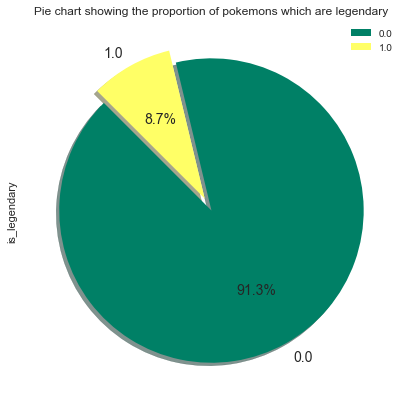

In [78]:
pokedata_final['is_legendary'].value_counts().plot(kind='pie',  explode = [0, 0.09], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(7,7), shadow=True, startangle=135, legend=True, cmap='summer')
plt.title('Pie chart showing the proportion of pokemons which are legendary')

#### How easy is it to capture legendary pokemons?

In [79]:
pd.DataFrame(pokedata_final.groupby('is_legendary')['capture_rate'].mean())

capture_rate
is_legendary              
0.0             106.709986
1.0              17.985714

**Observations** : capturing a legendary pokemon is much harder than a normal pokemon

Text(0.5, 1.0, 'Pie chart showing the percentage of pokemons in each generation')

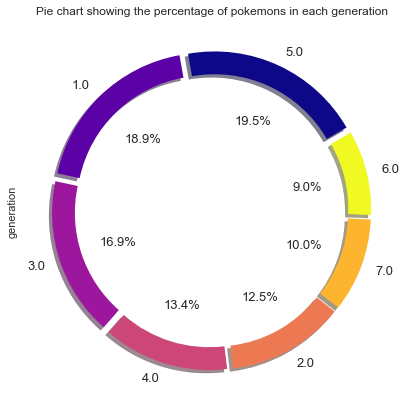

In [80]:

pokedata_final['generation'].value_counts().plot(kind='pie', explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05], shadow = True, 
                                                figsize = (15,7), fontsize = 13, autopct = "%3.1f%%", legend = False,
                                                cmap = "plasma", startangle = 30,wedgeprops=dict(width=0.15))
plt.title('Pie chart showing the percentage of pokemons in each generation')

#### Let us see to which generation legendary pokemon's belong :

Text(0.5, 1.0, 'Pie chart showing the percentage Legendary of pokemons in each generation')

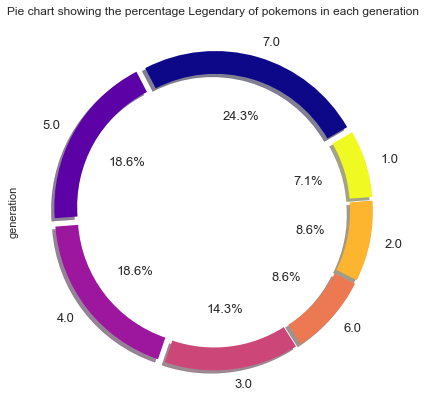

In [106]:

pokedata_final[pokedata_final['is_legendary']==1]['generation'].value_counts().plot(kind='pie', explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05], shadow = True, 
                                                figsize = (15,7), fontsize = 13, autopct = "%3.1f%%", legend = False,
                                                cmap = "plasma", startangle = 30,wedgeprops=dict(width=0.15))
plt.title('Pie chart showing the percentage Legendary of pokemons in each generation')

**Observation** : Legendary pokemon's can be found in almost all generations. but are found more in 7,5 and 4th generations

#### Let us see how a legendary pokemon flares compared to different parameters

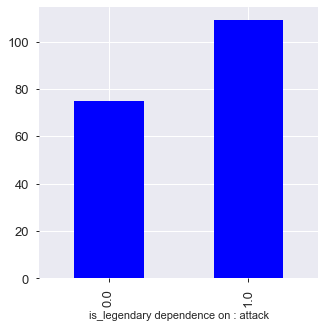

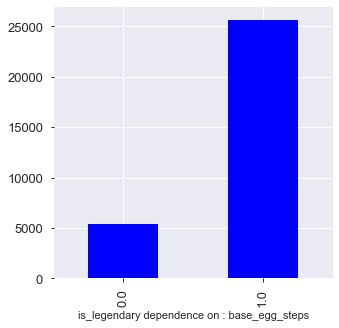

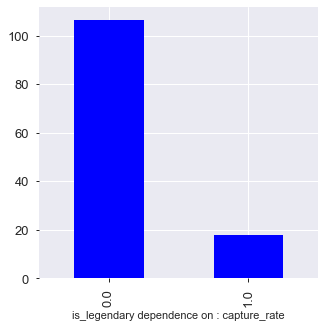

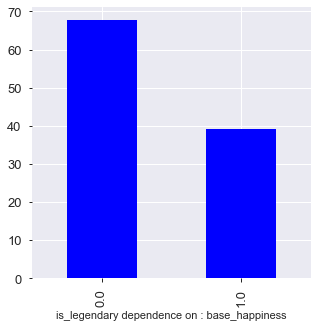

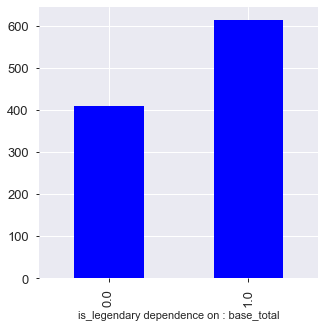

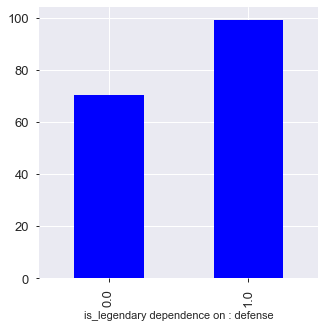

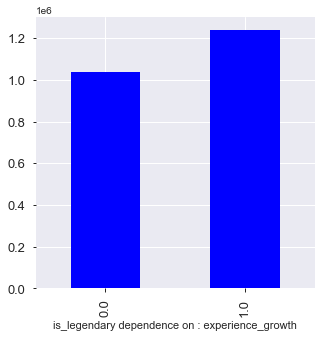

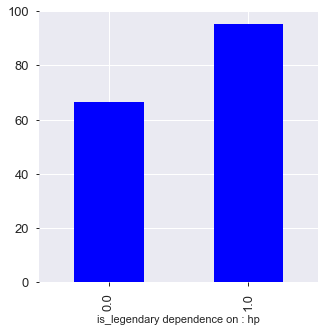

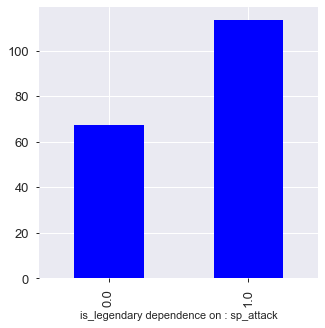

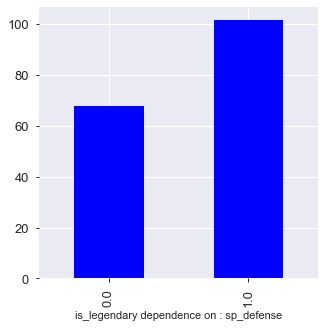

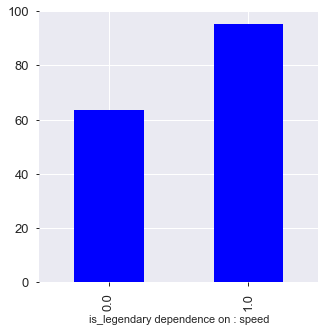

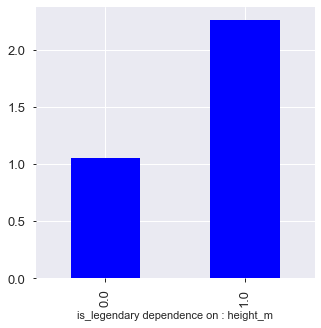

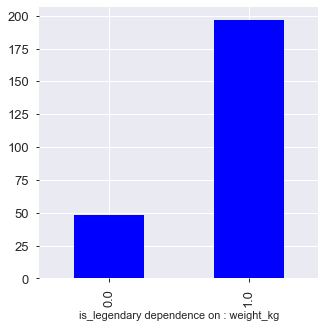

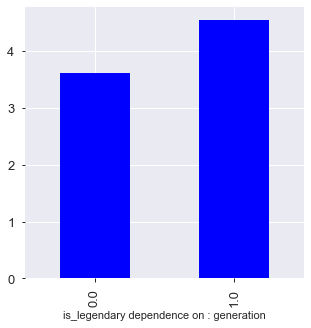

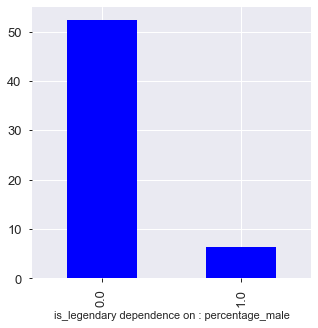

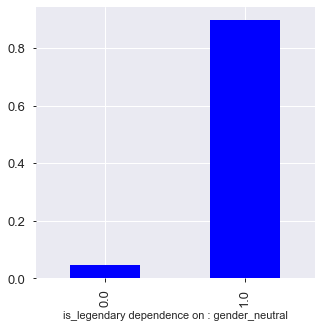

In [46]:
# Each column vs legendary check:
columns_in_focus = ['attack', 'base_egg_steps', 'capture_rate', 'base_happiness','base_total','defense','experience_growth','hp','sp_attack', 'sp_defense', 'speed','height_m','weight_kg','generation','percentage_male','gender_neutral'] 
for col in columns_in_focus:
    pokedata_final.groupby('is_legendary')[col].mean().plot( kind='bar', figsize=(5,5), fontsize=13, 
                                                                      color='blue')
    plt.xlabel('is_legendary dependence on : ' + col)
    plt.show()

**Observation**: 
  1. Legendary pokemons are more attacking
  2. To hatch a legendary pokemon it takes more steps (base_egg_steps are more)
  3. capture rate of legendary pokemon's is less.
  4. base happiness of legendary pokemon's is relatively lower and base_tatal is relatively higher than non-legendary pokemon.
  5. legendary pokemon's have higher defence, experience growth, hp, special attack(sp_attack), special defence(sp_defence) and speed.
  6. Legendary pokemon's height and weight is much more than non-legendary pokemons.
  7. Legendary pokemons are of higher generation
  8. Legendary pokemons are more common in gender neutral and female pokemons

#### Which type of pokemons have maximum legendary pokemons.

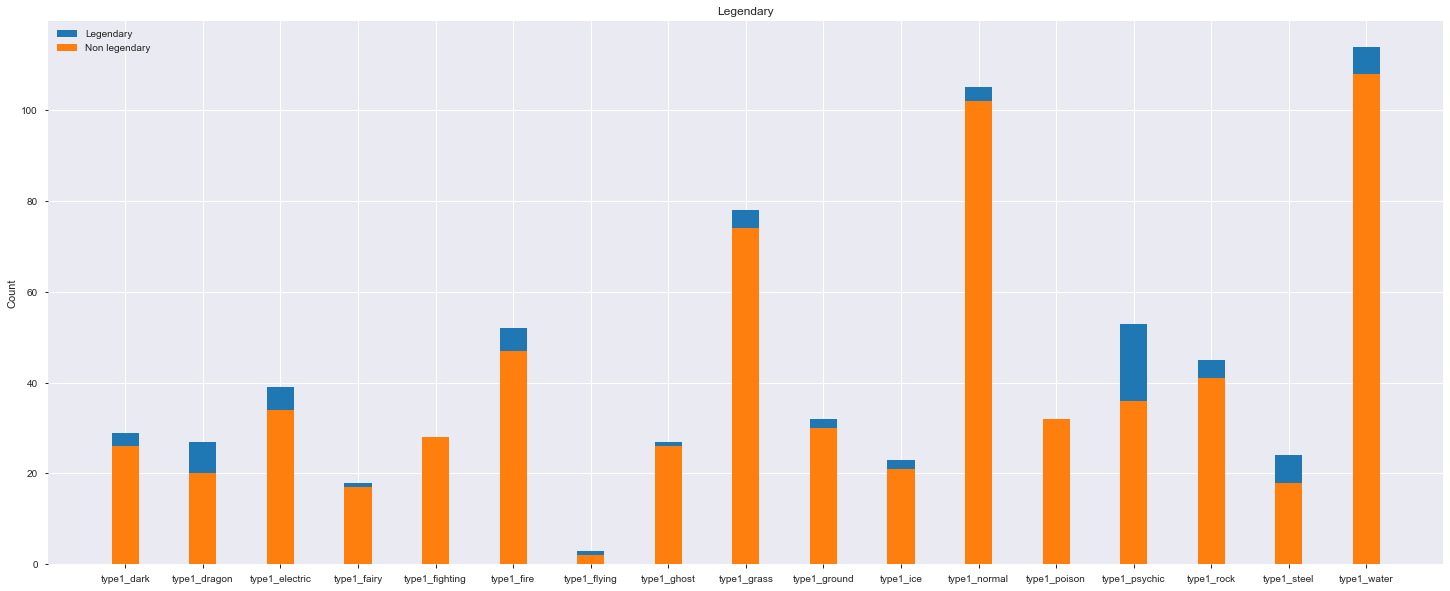

In [104]:
types = ['type1_dark', 'type1_dragon', 'type1_electric', 'type1_fairy', 'type1_fighting', 'type1_fire', 'type1_flying', 'type1_ghost', 'type1_grass', 'type1_ground', 'type1_ice', 'type1_normal', 'type1_poison', 'type1_psychic', 'type1_rock', 'type1_steel', 'type1_water']
fig, ax = plt.subplots(figsize = (25,10))
width = 0.35 
ax.bar(types, pokedata_final[pokedata_final['is_legendary'] == 1][types].sum(), width, label='Legendary',bottom=pokedata_final[pokedata_final['is_legendary'] == 0][types].sum())
ax.bar(types, pokedata_final[pokedata_final['is_legendary'] == 0][types].sum(), width, label='Non legendary')
ax.set_ylabel('Count')
ax.set_title('Legendary')
ax.legend()

plt.show()

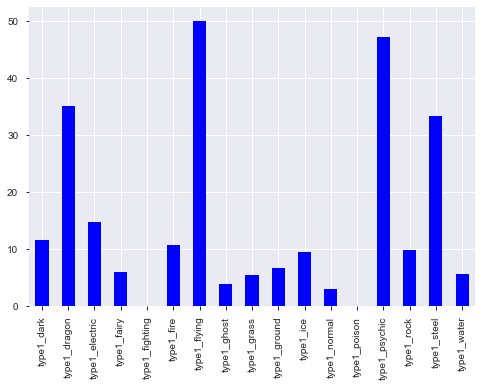

In [82]:
# Percentage of legendary pokemon's in each type
type_avg = {}
type_sum = {}
for type in types:
    type_avg[type] = pokedata_final[pokedata_final['is_legendary'] == 1][types].sum() * 100/ pokedata_final[pokedata_final['is_legendary'] == 0][types].sum()
   # type_sum[type] = [pokedata_final[pokedata_final['is_legendary'] == 1][types].sum(), pokedata_final[pokedata_final['is_legendary'] == 0][types].sum()]
pd.DataFrame(type_avg).plot(kind='bar',  color = "blue", legend =None)


In [75]:
pokedata_final[types].sum()

type1_dark         29.0
type1_dragon       27.0
type1_electric     39.0
type1_fairy        18.0
type1_fighting     28.0
type1_fire         52.0
type1_flying        3.0
type1_ghost        27.0
type1_grass        78.0
type1_ground       32.0
type1_ice          23.0
type1_normal      105.0
type1_poison       32.0
type1_psychic      53.0
type1_rock         45.0
type1_steel        24.0
type1_water       114.0
dtype: float64

**Observations** : When we check percentage of legendary pokemon's in each type, we find that more percentage of legendary pokemons are mainly from  flying, psychic, dragon and steel types. From previous charts and the above sum, it is also evident that we have very few data for certain types. for eample, flying type. Out of 3 pokemon data records we have, 50% pokemons are legendary. So for such data, this percentage calculation can be biased.

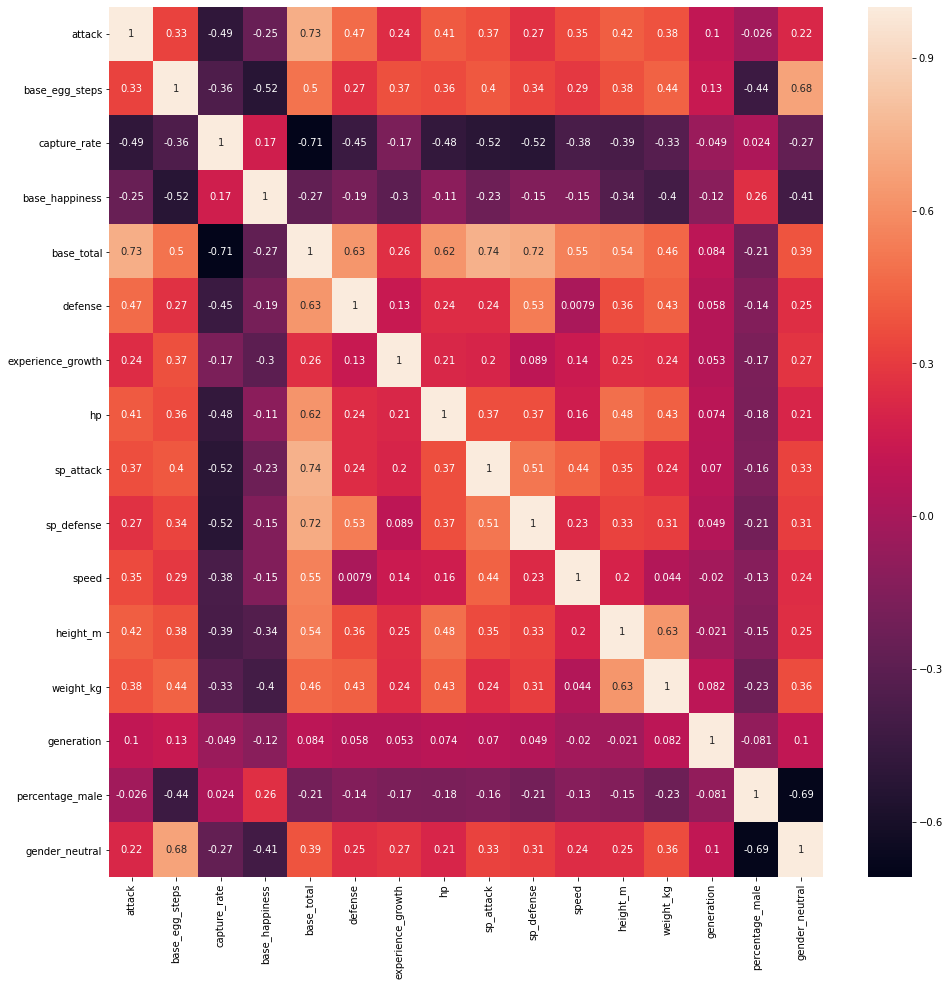

In [78]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap( pokedata_final[['attack', 'base_egg_steps', 'capture_rate', 'base_happiness','base_total','defense','experience_growth','hp','sp_attack', 'sp_defense', 'speed','height_m','weight_kg','generation','percentage_male','gender_neutral'] ].corr(), annot=True );

**Observations** : None of the existing columns are corelated with each other

<a id=section5></a>
## 5. Preprocessing the data:

<a id=section501></a>
###  5.1 Train-Test split

Splitting the data for Training & Testing. Train data will be used for training the models and Test data will be used for measuring the models.

In [83]:
from sklearn.model_selection import train_test_split
y = pokedata_final['is_legendary']
X = pokedata_final.loc[:,pokedata_final.columns != 'is_legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42, stratify=y)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 51)
(161, 51)
(640,)
(161,)


In [84]:
len(pokedata_final.columns)

52

<a id=section6></a>
## 6. User defined functions:

#### Defining user defined functions to reuse them with each algorithm

<a id=section601></a>
#### 6.1 User defined function to fit and predict the model

In [85]:
#Function for prediction

def get_predictions(clf, X_train, y_train, X_test, y_test):
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    
   # print('train-set confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
    return y_pred, y_pred_prob

<a id=section602></a>
#### 6.2 User defined function to print the classifier score

The function is returning accuracy_score as the goal of the analysis is just to predict the voice type and we are not interested in increasing precision or recall here. Also, since data is equally distributed, accuracy score works best and it is sufficient for us in the analysis. Though the function prints confusion matrix, recall score, precision score, f1 score, ROC AUC and also accuracy score, we are interested only in accuracy score for the project

In [86]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    return  accuracy_score(y_test,y_pred)

<a id=section7></a>
## 7. Modelling and prediction

Applying various models to see which one gives a better result. We are trying:
1. Gaussian Naive Bayees
2. K-Nearest Classifier
3. Logistic regression
4. LDA

<a id=section701></a>
## 7.1 Gaussian Naive Bayes

A naive Bayes classifier uses probability theory to classify data. Naive Bayes classifier algorithms make use of Bayes' theorem. The key insight of Bayes' theorem is that the probability of an event can be adjusted as new data is introduced.

In [87]:
y_pred_nb, y_pred_prob_nb = get_predictions(GaussianNB(), X_train, y_train, X_test, y_test)

In [85]:
print_scores(y_test,y_pred_nb,y_pred_prob_nb)

test-set confusion matrix:
 [[146   1]
 [  1  13]]
recall score:  0.9285714285714286
precision score:  0.9285714285714286
f1 score:  0.9285714285714286
accuracy score:  0.9875776397515528
ROC AUC: 0.9990281827016521


0.9875776397515528

#### Observations:
Accuracy score is 0.987. Need to see which other algorithm gives a better result.

<a id=section702></a>
## 7.2 KNearest Neighbour Classifier

K-Nearest Neighbours is one of the most basic yet essential classification algorithms which belongs to the supervised learning domain. K-Nearest neighbour can be used as both regressor and for classification.

When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.

it is a good idea to choose a K value with an odd number to avoid a tie. And the inverse, use an even number for K when you have an odd number of classes.

KNN Algorithm is based on feature similarity: Choosing the right value of k is a process called parameter tuning, and is important for better accuracy. 

So in the below code We are checking the kNN for various value of K. K values range from 1 to 28 (28 being sqrt(792). Here 792 is the number of test data points.

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_list = list(range(1,28,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    print("K=",k)
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred_knn, y_pred_prob_knn = get_predictions(knn, X_train, y_train, X_test, y_test)
    scores = print_scores(y_test,y_pred_knn,y_pred_prob_knn)
    cv_scores.append(scores)
print(cv_scores)
#knn = KNeighborsClassifier(n_neighbors=7)
#y_pred_knn, y_pred_prob_knn = get_predictions(knn, X_train, y_train, X_test, y_test)

K= 1
test-set confusion matrix:
 [[147   0]
 [  0  14]]
recall score:  1.0
precision score:  1.0
f1 score:  1.0
accuracy score:  1.0
ROC AUC: 1.0
K= 3
test-set confusion matrix:
 [[146   1]
 [  0  14]]
recall score:  1.0
precision score:  0.9333333333333333
f1 score:  0.9655172413793104
accuracy score:  0.9937888198757764
ROC AUC: 0.9990281827016521
K= 5
test-set confusion matrix:
 [[147   0]
 [  3  11]]
recall score:  0.7857142857142857
precision score:  1.0
f1 score:  0.88
accuracy score:  0.9813664596273292
ROC AUC: 0.9985422740524781
K= 7
test-set confusion matrix:
 [[147   0]
 [  3  11]]
recall score:  0.7857142857142857
precision score:  1.0
f1 score:  0.88
accuracy score:  0.9813664596273292
ROC AUC: 0.9987852283770651
K= 9
test-set confusion matrix:
 [[147   0]
 [  3  11]]
recall score:  0.7857142857142857
precision score:  1.0
f1 score:  0.88
accuracy score:  0.9813664596273292
ROC AUC: 0.9982993197278911
K= 11
test-set confusion matrix:
 [[147   0]
 [  3  11]]
recall score:  

The accuracy_scores of different k values can be plotted to see which k value to chose

<Figure size 432x288 with 0 Axes>

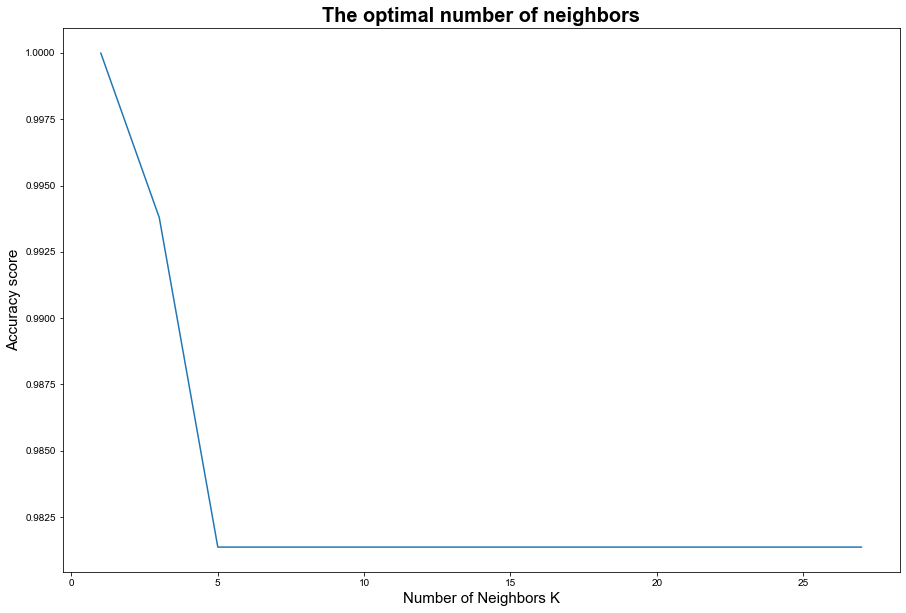

In [87]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores)

plt.show()

**Observations** :We are getting the best results with k=1. Since k=1 is the best fit, with very high precision, f1 score, recall score and accuracy, let's chose k=1. Though it looks overfitting, we have to see the nearest neighbour of a pokemon and see if it is legendary or not.

<a id=section703></a>
## 7.3 Using Logistic Regression

Logistic regression is a supervised learning techinques which helps in classification problems.Logistic Regression is used when the dependent variable(target) is categorical. Sigmoid function or logistic function is used as hypothesis function for logistic regression.

In [89]:
# let us check recall score for logistic regression
y_pred_lr, y_pred_prob_lr = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
                                      , X_train, y_train, X_test, y_test)

In [90]:
print_scores(y_test,y_pred_lr,y_pred_prob_lr)

test-set confusion matrix:
 [[147   0]
 [  3  11]]
recall score:  0.7857142857142857
precision score:  1.0
f1 score:  0.88
accuracy score:  0.9813664596273292
ROC AUC: 0.9965986394557822


0.9813664596273292

#### Observations
Accuracy score for logistic regression is 0.9621. Logistic regression is performing better than Naive Bayes and almost equal to KNN. 

<a id=section704></a>
## 7.4 Using LDA:

Linear Discriminant Analysis is a __dimensionality reduction__ technique used as a __preprocessing step__ in Machine Learning and __pattern classification applications__.

Linear Discriminant Analysis is a __supervised classification technique__ which takes labels into consideration.

In [95]:
# let us check recall score for logistic regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
y_pred_lda, y_pred_prob_lda = get_predictions(lda, X_train, y_train, X_test, y_test)

In [96]:
print_scores(y_test,y_pred_lda,y_pred_prob_lda)

test-set confusion matrix:
 [[147   0]
 [  2  12]]
recall score:  0.8571428571428571
precision score:  1.0
f1 score:  0.923076923076923
accuracy score:  0.9875776397515528
ROC AUC: 0.9990281827016521


0.9875776397515528

<a id=section8></a>
## 8 Conclusion:

In this exercise, we are interested in how well the algorithms can classify the pokemon data and identify legendary pokemons.

<table style="border: 1px solid black; border-collapse: collapse; background-color:#dce5e6; width:70%; align=left;">
    <tr>
        <th>Algorithm </th><th> Accuracy Score</th>        <th> recall score</th>  <th>   precision score</th> <th>   f1 score</th> <th>   ROC AUC</th>
    </tr>
    <tr>
        <td> Naive Bayes </td><td>0.9875 </td><td> 0.9285 </td> <td> 0.9285</td><td> 0.9285  </td><td> 0.9990</td>
     <tr> 
        <td> K-Nearest Neighbour(1 neighbour) </td> <td>1.0 </td><td> 1.0</td> <td> 1.0</td><td>1.0 </td><td> 1.0</td>
     </tr>
     <tr> 
        <td> K-Nearest Neighbour(3 neighbours) </td> <td>0.9937</td><td> 1.0</td> <td> 0.9333</td><td>0.9655</td><td> 0.9990</td>
     </tr>
     <tr>
        <td> Logistic Regression </td><td>0.9813 </td><td>0.7857</td><td>1.0</td><td>0.88</td><td> 0.9965</td>
     </tr>
     <tr>
        <td> LDA </td><td>0.9875 </td><td>0.8571</td><td>1.0</td><td>0.9230</td><td> 0.9990</td>
     </tr>
 </table>

##### K-Nearest algorithm(Both N=1 and 3) are giving very good results for accuracy score and recall score.  Naive bayes is the next best algorithm with accuraycy and recall score. 